# Step 5 - Solar Composition

Besides stellar abundances data, the abundance distribution of the Sun can be used to constrain your Milky Way model. The solar composition represents only one timeframe in the history of the Milky Way. But the advantage is that there are data for all the elements and isotopes. This notebook will show you how to compare your chemical evolution predictions with the solar composition.

**Open-source Python packages**
* [NuPyCEE](https://github.com/NuGrid/NuPyCEE) - NuGrid Python Chemical Evolution Environment
* [JINAPyCEE](https://github.com/becot85/JINAPyCEE) - JINA Python Chemical Evolution Environment

In [1]:
# Import the OMEGA+ code and standard packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from JINAPyCEE import omega_plus

In [2]:
# Load the functions for extracting abundances distributions
%run script_solar_ab.py

### Select your Input Stellar Yields Table
Un-comment only one option. As a first pass, use the default option. **Don't forget to re-run OMEGA+** when choosing a different table.

In [3]:
# Karakas et al. (2010) for AGB stars - http://adsabs.harvard.edu/abs/2010MNRAS.403.1413K
# Kobayashi et al. (2006) for massive stars - http://adsabs.harvard.edu/abs/2006ApJ...653.1145K
table = 'yield_tables/agb_and_massive_stars_K10_K06_0.5HNe.txt'

# NuGrid - Ritter et al. (2018) - http://adsabs.harvard.edu/abs/2018MNRAS.480..538R
table = 'yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt'

### Run OMEGA+ with the Input Parameters Defined in Step 1

In [4]:
# Define the input parameters constrained during Step 1.
sfe = 0.02
t_star = 1.0e8
in_mag = 1.0

# Number of Type Ia supernova per units of stellar mass formed.
# You will adjust this number in Exercise 1.
nb_1a_per_m = 1.0e-2

# Number of neutron star mergers per units of stellar mass formed.
# You will adjust this number in Exercise 3.
nb_nsm_per_m = 1.0e-6

# Run OMEGA+ with your set of parameters (simple Milky Way model).
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
r_process_yields = 'yield_tables/r_process_arnould_2007.txt'
o = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, \
                          special_timesteps=120, table=table, nb_1a_per_m=nb_1a_per_m,\
                          ns_merger_on=True, nb_nsm_per_m=nb_nsm_per_m,
                          t_nsm_coal=1.0e8, nsmerger_table=r_process_yields)

# Timestep index where the Sun should aproximately form.
# The index is only valid with "special_timesteps=120".
# Do not modify.
i_t_Sun = 115

# Get source contributions (this needs to be right after running OMEGA+)
m_el_all, m_el_agb, m_el_massive, m_el_sn1a, m_el_nsm = \
    get_individual_sources(o.inner, i_step_sol=i_t_Sun)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 9.25s
   OMEGA+ run completed - Run time: 9.26s


# Exercise 1. Iron-Peak Elements
* Find the number of Type Ia supernovae needed in order to match the iron-peak elements in the Sun.
    * Modify the input parameter "nb_1a_per_m" (see above).

<IPython.core.display.Javascript object>


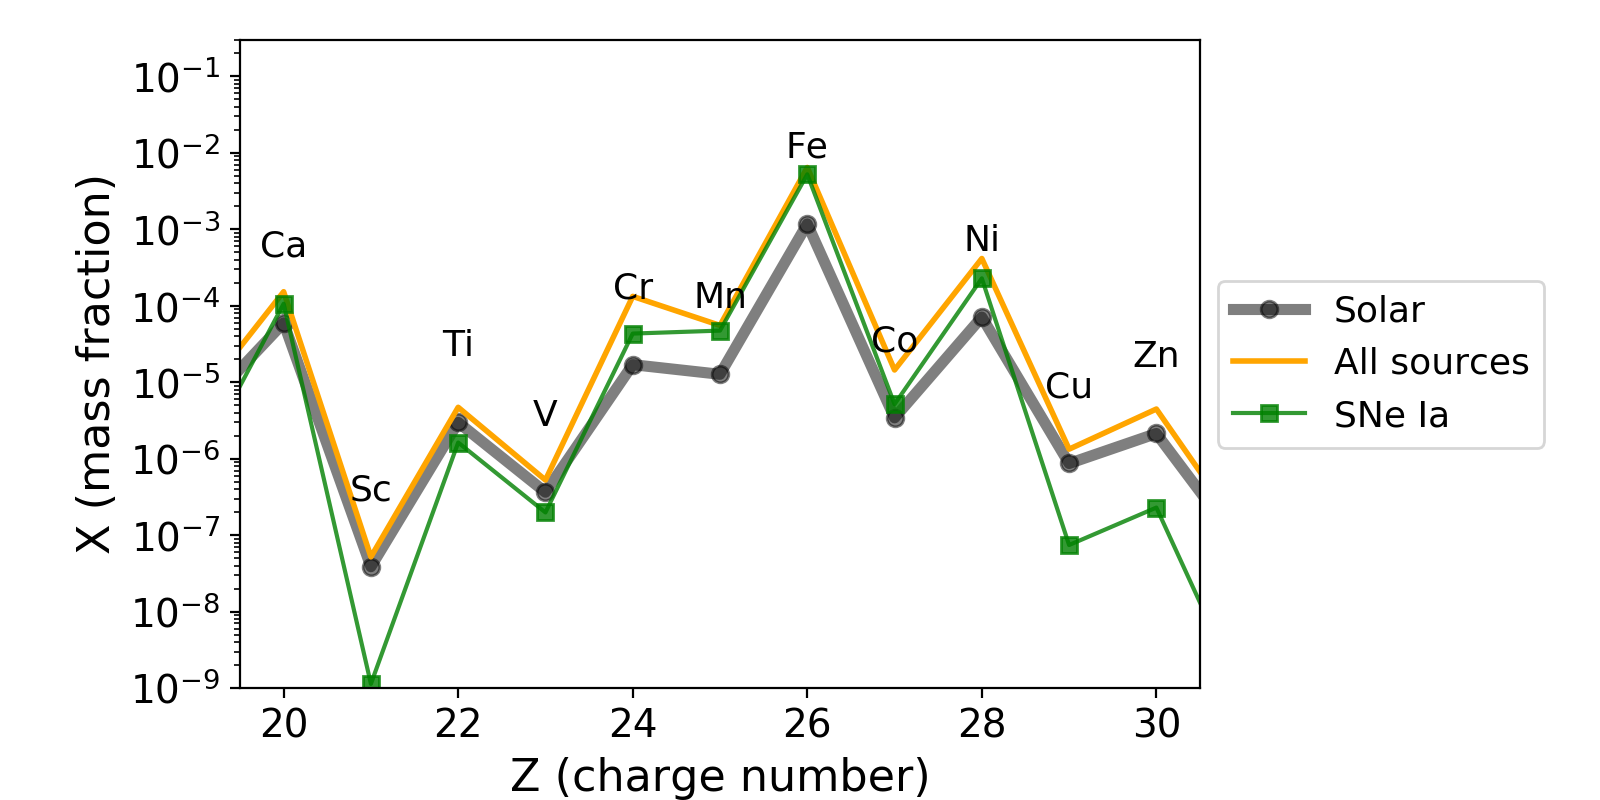

In [5]:
# Define the figure size
%matplotlib nbagg
fig = plt.figure(figsize=(8,4.0))
matplotlib.rcParams.update({'font.size': 14.0})

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=4, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=2)

# Type Ia supernovae
plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Massive stars (core-collapse supernovae)
#plt.plot(Z_charge, m_el_massive, color='b', label='Massive', alpha=0.8, linestyle='-', marker='^')

# AGB stars
#plt.plot(Z_charge, m_el_agb, color='r', label='AGB', alpha=0.8, linestyle='-', marker='x')

# Neutron star mergers (r-process)
#plt.plot(Z_charge, m_el_nsm, color='c', label='NS mergers', alpha=0.8, linestyle='-', marker='s')

# Add element annotations
for i in range(0,nb_elements):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=13, ha='center', va='center')

# Label and axis
plt.legend(fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(19.5,30.5)
plt.ylim(1e-9,3e-1)
plt.yscale('log')

# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

# Exercise 2. Light Elements
* Which elements are mostly produced by massive stars?
* Which elements are mostly produced by low- and intermediate-mass AGB stars?
* Are the results consistent with what you found in Step 2?
* Which elements are not well reproduced by your Milky Way model?

**Important note:** You need to callibrate your Type Ia supernovae first (Exercise 1).

<IPython.core.display.Javascript object>


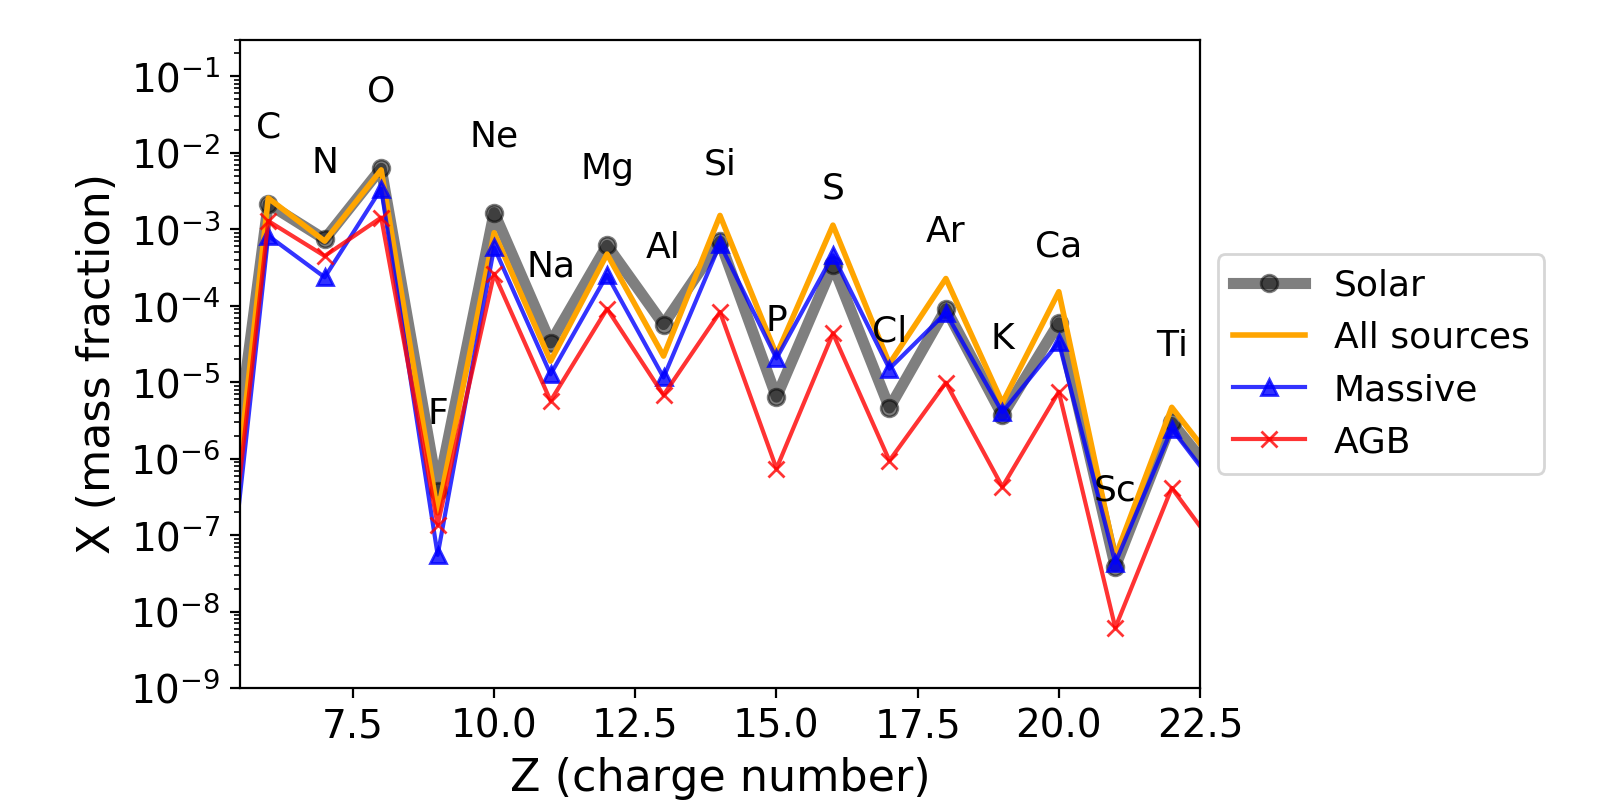

In [6]:
# Define the figure size
%matplotlib nbagg
fig = plt.figure(figsize=(8,4.0))
matplotlib.rcParams.update({'font.size': 14.0})

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=4, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=2)

# Type Ia supernovae
#plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Massive stars (core-collapse supernovae)
plt.plot(Z_charge, m_el_massive, color='b', label='Massive', alpha=0.8, linestyle='-', marker='^')

# AGB stars
plt.plot(Z_charge, m_el_agb, color='r', label='AGB', alpha=0.8, linestyle='-', marker='x')

# Neutron star mergers (r-process)
#plt.plot(Z_charge, m_el_nsm, color='c', label='NS mergers', alpha=0.8, linestyle='-', marker='s')

# Add element annotations
for i in range(0,nb_elements):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=13, ha='center', va='center')

# Label and axis
plt.legend(fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(5.5,22.5)
plt.ylim(1e-9,3e-1)
plt.yscale('log')

# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

# Exercise 3. Neutron-Capture Elements
* Find the number of neutron star (NS) mergers needed in order to match neutron-capture elements in the Sun.
    * Modify the input parameter "nb_nsm_per_m" (see above).
* Explore the impact of using different AGB yields for the production of s-process elements.
    * Modify the input parameter "table" (see above).

**Important note:** For this exercise, the following table **cannot be used**: table = 'yield_tables/agb_and_massive_stars_K10_K06_0.5HNe.txt'

**Important note:** This is assuming NS mergers are the only r-process site. **This may not be true**.

**Useful information:** You can make zooms on the figure below to look at a certain region in more details.

<IPython.core.display.Javascript object>


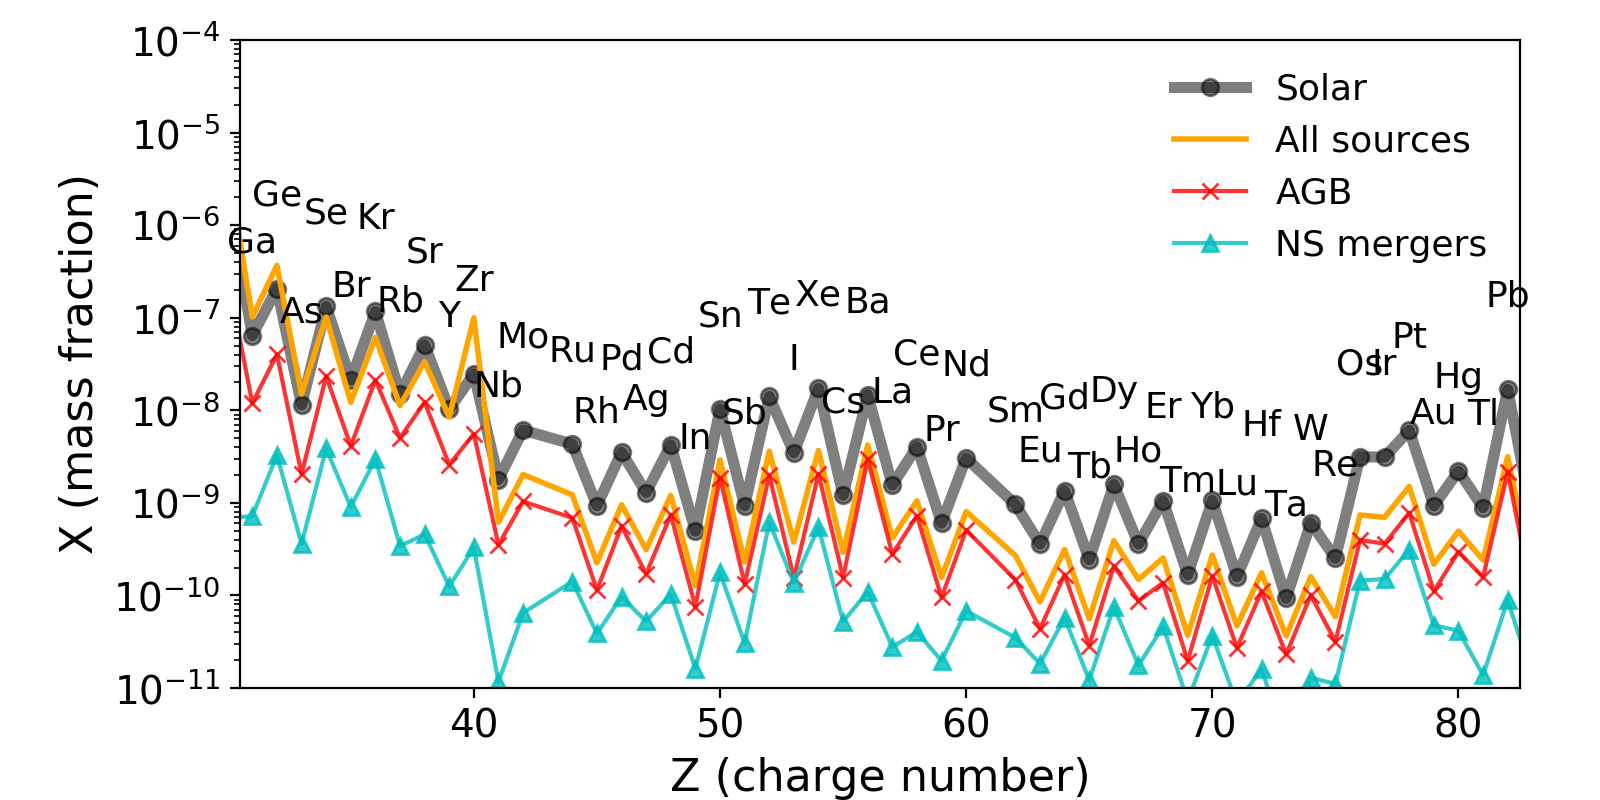

In [9]:
# Define the figure size
%matplotlib nbagg
fig = plt.figure(figsize=(8,4.0))
matplotlib.rcParams.update({'font.size': 14.0})

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=4, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=2)

# Type Ia supernovae
#plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Massive stars (core-collapse supernovae)
#plt.plot(Z_charge, m_el_massive, color='b', label='Massive', alpha=0.8, linestyle='-', marker='^')

# AGB stars
plt.plot(Z_charge, m_el_agb, color='r', label='AGB', alpha=0.8, linestyle='-', marker='x')

# Neutron star mergers (r-process)
plt.plot(Z_charge, m_el_nsm, color='c', label='NS mergers', alpha=0.8, linestyle='-', marker='^')

# Add element annotations
for i in range(0,nb_elements):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=13, ha='center', va='center')

# Label and axis
plt.legend(fontsize=13, frameon=False)
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(30.5,82.5)
plt.ylim(1e-11,1e-4)
plt.yscale('log')

# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.95)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

# Exercise 4 (optional)
* If you find weird features, you can use SYGMA to isolate the stellar models that generate them.

In [9]:
import sygma
s_0_02 = sygma.sygma(iniZ=0.02)
s_0_01 = sygma.sygma(iniZ=0.01)
s_0_006 = sygma.sygma(iniZ=0.006)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.34s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.32s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.32s


<IPython.core.display.Javascript object>


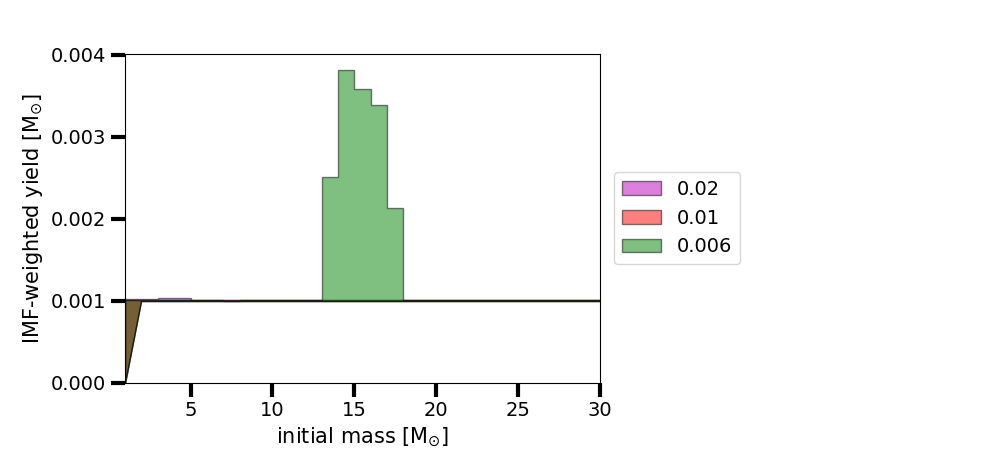

In [12]:
%matplotlib nbagg
specie = 'Zr'
s_0_02.plot_mass_range_contributions(specie=specie, label='0.02', color='m')
s_0_01.plot_mass_range_contributions(specie=specie, label='0.01', color='r')
s_0_006.plot_mass_range_contributions(specie=specie, label='0.006', color='g')